In [1]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
X,y = make_regression(n_samples = 100 , n_features = 1 , n_informative = 1 , n_targets = 1 , noise = 20) 


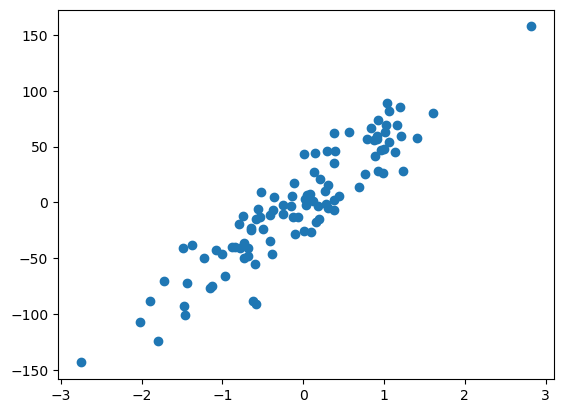

In [3]:
plt.scatter(X,y) 

In [4]:
from sklearn.linear_model import LinearRegression 

In [5]:
lr = LinearRegression() 

In [6]:
lr.fit(X,y) 
print(lr.coef_) 
print(lr.intercept_)

[52.76793048]
1.3903078470071624


In [7]:
m = 15.62

In [8]:
class GDRegressor:
    
    def __init__(self , learning_rate , epochs):
        self.m = 15.62
        self.b = 0   # starting i am take this value as 0 
        self.lr = learning_rate 
        self.epochs = epochs 
        
    def fit(self,X,y):
        #Calculate the b using GD 
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y - self.m*X.ravel()-self.b)
            self.b = self.b - (self.lr * loss_slope)
#             print(loss_slope , self.b) 
        print(self.b)
            

        

In [9]:
gd  =GDRegressor(0.001 , 100)   # check learning rate and epochs


In [10]:
gd.fit(X,y) 

-0.6665012672644821


# Now this time to check both on m and b 

In [53]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import cross_val_score

In [54]:
X,y = make_regression(n_samples = 100 , n_features = 1 ,
                      n_informative = 1 , n_targets = 1 , noise = 20 , random_state = 13)

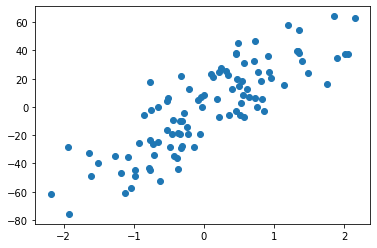

In [55]:
plt.scatter(X,y) 

In [56]:
from sklearn.model_selection import train_test_split 
X_train , X_test  ,y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=2)

In [57]:
lr = LinearRegression() 

In [58]:
lr.fit(X_train,y_train) 
print(lr.coef_) 
print(lr.intercept_) 

[28.12597332]
-2.271014426178382


In [59]:
# np.mean(cross_val_score(lr , X,y, scoring ='r2' , cv = 10 ))


y_pred = lr.predict(X_test) 
from sklearn.metrics import r2_score 
r2_score(y_test , y_pred) 

0.6345158782661013

In [60]:
class GDRegressor : 
    
    def __init__(self , learning_rate , epochs):
        self.m = 100   # we can start any number as like m = 0 
        self.b = -120  # we can start any number as like b = 1 
        self.lr = learning_rate 
        self.epochs = epochs 
        
    def fit(self , X,y):
        #Calculate the b using GD 
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2*np.sum((y - self.m*X.ravel() - self.b)*X.ravel())  
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m) 
        print(self.b , self.m)  
        
    def predict(self , X):
        return self.m * X + self.b 
        

In [61]:
gd = GDRegressor(0.001 , 100)

In [62]:
gd.fit(X_train,y_train) 

-2.2710234077993587 28.12598618006269


In [63]:
# gd.predict(X)

In [64]:
y_pred = gd.predict(X_test) 
from sklearn.metrics import r2_score 
r2_score(y_test , y_pred)

0.634515826773629